
# **Running Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:

# # Create SparkSession from builder
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[1]") \
#                     .appName('SparkByExamples.com') \
#                     .getOrCreate()

In [ ]:
print("Spark Version: " + spark.version)
print(spark.sparkContext)
print(spark.sparkContext.appName)

Spark Version: 3.0.0
<SparkContext master=local[*] appName=pyspark-shell>
pyspark-shell


In [ ]:
df = spark.read.csv("BostonHousing.csv", header=True)

In [ ]:
#Showing the top 5 rows.
df.show(5)



+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632| 18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|  24|
|0.02731|  0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729|  0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237|  0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905|  0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [ ]:
#Counting the number of rows in the dataset.
row_count = df.rdd.count()
print(row_count)

506


In [ ]:
#Showing the schema of the dataset
df.printSchema()


root
 |-- crim: string (nullable = true)
 |-- zn: string (nullable = true)
 |-- indus: string (nullable = true)
 |-- chas: string (nullable = true)
 |-- nox: string (nullable = true)
 |-- rm: string (nullable = true)
 |-- age: string (nullable = true)
 |-- dis: string (nullable = true)
 |-- rad: string (nullable = true)
 |-- tax: string (nullable = true)
 |-- ptratio: string (nullable = true)
 |-- b: string (nullable = true)
 |-- lstat: string (nullable = true)
 |-- medv: string (nullable = true)



In [ ]:
#Dropping the column 'b'
df=df.drop('b')



In [ ]:
#Converting all the colums from string to double
from pyspark.sql.functions import col
df = df.select([col(c).cast("double").alias(c) for c in df.columns])
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: double (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: double (nullable = true)
 |-- tax: double (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
#Converting numerical columns into two decimal place
from pyspark.sql.functions import round as spark_round
numeric_cols = [col_name for col_name, dtype in df.dtypes if dtype in ('int', 'double')]

for col_name in numeric_cols:
    df = df.withColumn(col_name, spark_round(col(col_name), 2))

df.show(5)  # Display the first 5 rows to check rounding

+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+
only showing top 5 rows



In [ ]:
#Creating a new column Age10
df = df.withColumn("Age10", col("Age") * 1.10)
df.show(5)

+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+------------------+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 5.33|36.2|59.620000000000005|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+------------------+
only showing top 5 rows



In [ ]:
#Converting to Pandas dataframe
df_pd = df.toPandas()

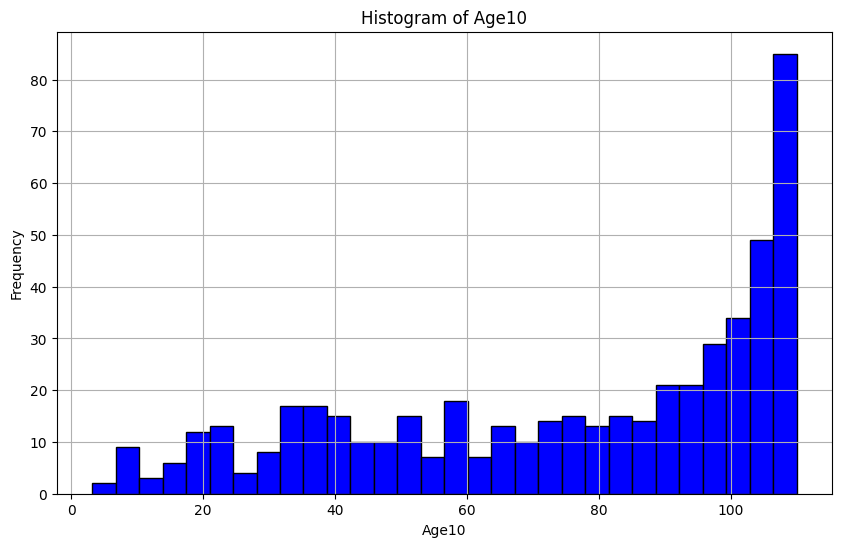

In [ ]:
#Creating the histogram
import matplotlib.pyplot as plt

# Plot the 'Age10' column
# Collect data for plotting
age10_data = df.select("Age10").toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(age10_data["Age10"], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of Age10")
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
#Summary Statistics
summary_stats = df.describe()
summary_stats.show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [ ]:
# Show the last 5 rows of Pandas DataFrame
pandas_df = df.toPandas()

#Show the last 5 rows of Pandas DataFrame
print(pandas_df.tail(5))

     crim   zn  indus  chas   nox    rm   age   dis  rad    tax  ptratio  \
501  0.06  0.0  11.93   0.0  0.57  6.59  69.1  2.48  1.0  273.0     21.0   
502  0.05  0.0  11.93   0.0  0.57  6.12  76.7  2.29  1.0  273.0     21.0   
503  0.06  0.0  11.93   0.0  0.57  6.98  91.0  2.17  1.0  273.0     21.0   
504  0.11  0.0  11.93   0.0  0.57  6.79  89.3  2.39  1.0  273.0     21.0   
505  0.05  0.0  11.93   0.0  0.57  6.03  80.8  2.51  1.0  273.0     21.0   

     lstat  medv   Age10  
501   9.67  22.4   76.01  
502   9.08  20.6   84.37  
503   5.64  23.9  100.10  
504   6.48  22.0   98.23  
505   7.88  11.9   88.88  
